<a href="https://colab.research.google.com/github/JordanDCunha/On-Complexity/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4.1 Introduction

- The next three chapters focus on **systems composed of components and connections**.
- Examples of such systems include:
  - **Social networks**: components are people; connections represent relationships (friendships, business ties, etc.).
  - **Ecological food webs**: components are species; connections represent predator–prey relationships.

- This chapter introduces **NetworkX**, a Python library used to model and analyze network-based systems.

- The first model covered is the **Erdős–Rényi random graph model**, which has important mathematical properties.

- Later chapters introduce **more realistic network models** that better explain real-world systems.

- All code for this chapter is available in **`chap04.ipynb`** in the book’s repository.
- Additional guidance on using the code can be found in:
  - **Section 1.5**
  - **Appendix A**
  - **Appendix B**


### 4.2 What Is a Graph?

- In this chapter, a **graph** is **not** a chart or plot (e.g., bar chart or stock prices).
- A graph represents a **system of discrete, interconnected elements**.

#### Basic Components
- **Nodes (vertices)** represent the elements of the system.
- **Edges** represent the connections between nodes.

#### Examples
- **Road map**:
  - Nodes = cities
  - Edges = roads between cities
- **Social network**:
  - Nodes = people
  - Edges = relationships (e.g., friends, followers)

#### Edge Attributes
- Edges may have attributes such as:
  - **Length**
  - **Cost**
  - **Weight**
- Example:
  - Road maps may use edge weights for distance or travel time.
  - Social networks may use different edge types for different relationships.

#### Directed vs. Undirected Edges
- **Undirected edges**:
  - Represent symmetric relationships.
  - Example: Facebook friendships.
- **Directed edges**:
  - Represent asymmetric relationships.
  - Example: Twitter “follows” relationships.

#### Graph Theory
- Graphs have important mathematical properties.
- The study of graphs is called **graph theory**.

#### Graph Algorithms
- Many real-world problems can be solved using graph algorithms.
- Example:
  - **Dijkstra’s algorithm** finds the shortest path from one node to all others.
  - A **path** is a sequence of nodes connected by edges.

#### Visualization
- Nodes are usually drawn as circles or squares.
- Edges are drawn as lines (or arrows for directed edges).
- Graph layout is often arbitrary and does not always reflect real-world geography.


### 4.3 NetworkX

- **NetworkX** is the most commonly used Python library for working with graphs.
- It supports:
  - Directed graphs
  - Undirected graphs
  - Graph drawing and visualization
- Nodes can be **any hashable type** (strings, numbers, tuples, etc.).

---

### Directed Graph Example

- A **directed graph** is created using `nx.DiGraph()`.
- Nodes are added using `add_node`.
- Edges are added using `add_edge`.
- The `nodes()` method returns a `NodeView`.
- The `edges()` method returns all directed edges.


In [36]:
import networkx as nx

# create a directed graph
G = nx.DiGraph()

# add nodes
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')

# view nodes
G.nodes()


NodeView(('Alice', 'Bob', 'Chuck'))

In [37]:
# add edges
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')

# view edges
G.edges()


OutEdgeView([('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')])

### Drawing Directed Graphs

- NetworkX provides multiple layout options.
- `draw_circular` places nodes in a circle.
- `with_labels=True` displays node names.


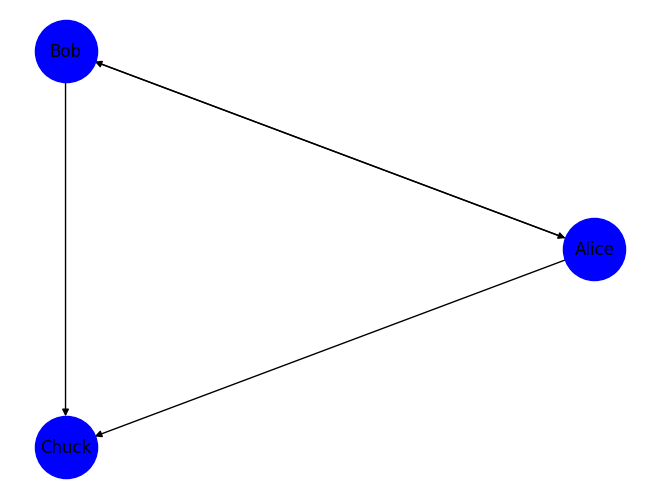

In [38]:
COLORS = ["blue", "orange", "green", "red"]


nx.draw_circular(
    G,
    node_color=COLORS[0],
    node_size=2000,
    with_labels=True
)


### Undirected Graph Example

- An **undirected graph** is created using `nx.Graph()`.
- A dictionary called `positions` maps:
  - city → (longitude, latitude)
- `add_nodes_from` adds nodes using dictionary keys.
- `drive_times` maps:
  - (city1, city2) → driving time
- `add_edges_from` adds edges using dictionary keys.


In [39]:
positions = dict(
    Albany=(-74, 43),
    Boston=(-71, 42),
    NYC=(-74, 41),
    Philly=(-75, 40)
)


In [40]:
G = nx.Graph()
G.add_nodes_from(positions)


In [41]:
drive_times = {
    ('Albany', 'Boston'): 3,
    ('Albany', 'NYC'): 4,
    ('Boston', 'NYC'): 4,
    ('NYC', 'Philly'): 2
}


In [42]:
G.add_edges_from(drive_times)


### Drawing Undirected Graphs with Edge Labels

- `draw` uses the `positions` dictionary to place nodes.
- `draw_networkx_edge_labels` adds labels to edges.
- `edge_labels` expects a dictionary:
  - (node1, node2) → label


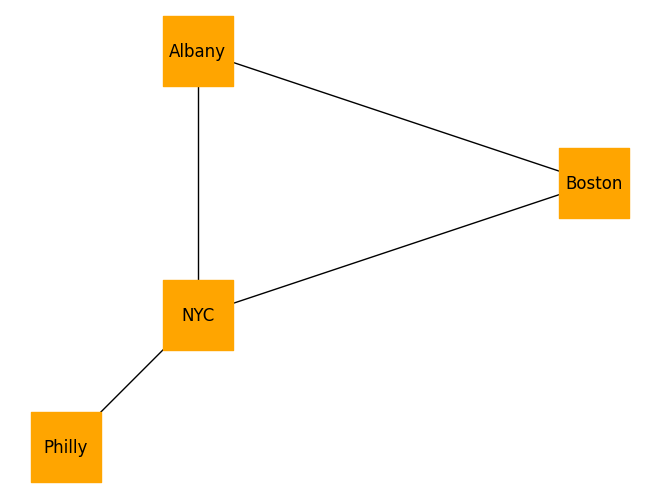

In [43]:
nx.draw(
    G,
    positions,
    node_color=COLORS[1],
    node_shape='s',
    node_size=2500,
    with_labels=True
)


{('Albany', 'Boston'): Text(-72.50000336348421, 42.500001121161404, '3'),
 ('Albany', 'NYC'): Text(-74.0, 41.999998480590875, '4'),
 ('Boston', 'NYC'): Text(-72.49999663651579, 41.500001121161404, '4'),
 ('NYC', 'Philly'): Text(-74.50000020556035, 40.499999794439645, '2')}

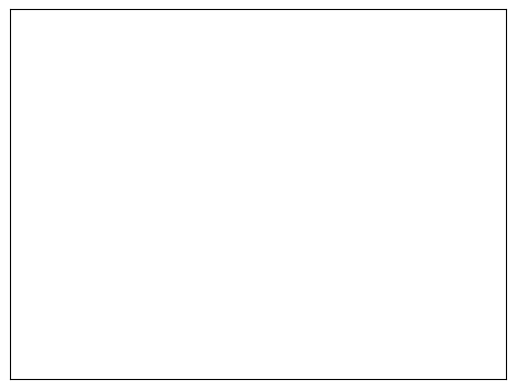

In [44]:
nx.draw_networkx_edge_labels(
    G,
    positions,
    edge_labels=drive_times
)


### Key Takeaways

- `positions` → maps nodes to coordinates
- `add_nodes_from()` → adds nodes from an iterable
- `drive_times` → maps edges to weights
- `add_edges_from()` → adds edges from iterable
- `draw()` → positions nodes using coordinates
- `draw_networkx_edge_labels()` → adds edge labels


### 4.4 Random Graphs

- A **random graph** is a graph where nodes and edges are generated randomly.
- There are many types of random graphs, depending on the random process used.

#### Erdős–Rényi (ER) Model
- One of the most studied random graph models.
- Developed by **Paul Erdős** and **Alfréd Rényi** in the 1960s.

#### Parameters of an ER Graph
- **n**: number of nodes
- **p**: probability that an edge exists between any two nodes
- Denoted as: **G(n, p)**

#### Key Properties
- ER graphs exhibit **abrupt transitions** in structure as edges are added.
- One important property that changes abruptly is **connectivity**.

#### Connectivity
- An **undirected graph** is *connected* if there is a path between every pair of nodes.
- When **p is small**, the probability that the graph is connected is very low.
- When **p is large**, the probability that the graph is connected is close to 1.

#### Critical Threshold
- There exists a **critical probability**:
$$p_c = \frac{\ln n}{n}$$
- If:
  - \( p < p_c \) → graph is **unlikely** to be connected
  - \( p > p_c \) → graph is **very likely** to be connected

#### Key Insight
- ER graphs undergo a **phase transition** in connectivity around \( p_c \).
- Small changes in \( p \) near this value can dramatically change the graph structure.

#### Next Steps
- Algorithms can be used to:
  - Generate random graphs
  - Test whether they are connected



### 4.5 Generating Graphs

- A **complete graph** is a graph where **every node is connected to every other node**.
- Complete graphs are useful as a starting point for building more complex random graphs.
- In this section, we:
  - Generate all possible pairs of nodes
  - Use those pairs to construct a complete graph
  - Visualize the result using NetworkX

---

### Generator Function: `all_pairs`

- A **generator function** is used to produce values one at a time using `yield`.
- `all_pairs`:
  - Takes a list of nodes
  - Enumerates all **distinct unordered pairs**
  - Avoids duplicate edges and self-loops

---

### Building a Complete Graph

- The function `make_complete_graph(n)`:
  - Creates an empty undirected graph
  - Adds `n` nodes
  - Adds edges between **every pair of nodes**
  - Returns the completed graph

---

### Visualization

- A complete graph with **10 nodes** is created and drawn.
- `draw_circular` places nodes evenly around a circle.
- This visualization corresponds to **Figure 4.3**.
- This code will later be adapted to generate **Erdős–Rényi random graphs**.

---

### Next Step

- Develop functions to check whether a graph is **connected**.


In [45]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i > j:
                yield u, v


In [46]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G


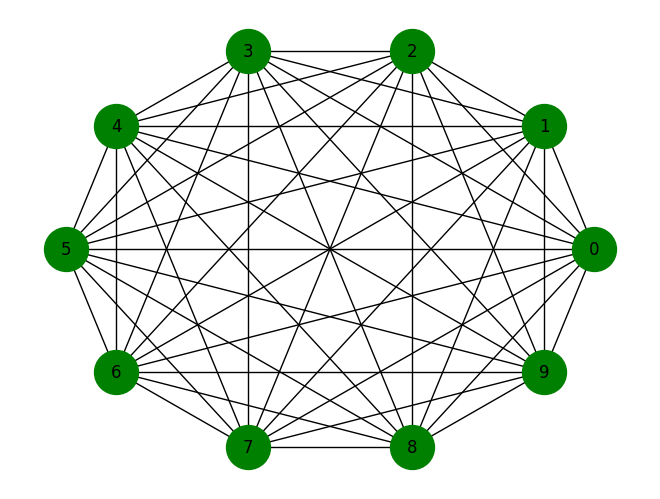

In [47]:
complete = make_complete_graph(10)

nx.draw_circular(
    complete,
    node_color=COLORS[2],
    node_size=1000,
    with_labels=True
)


### 4.6 Connected Graphs

- A graph is **connected** if there is a **path from every node to every other node**.
- Connectivity is important in many real-world graph applications.
- There is a simple algorithm to test connectivity:
  - Start from one node
  - Visit all nodes reachable from it
  - If all nodes are reachable, the graph is connected

---

### Graph Traversal Idea

- Begin at a starting node `s`
- Mark `s` as **seen**
- Visit all neighbors of `s`
- Then visit neighbors of neighbors
- Continue until no new nodes can be reached

---

### Neighbors in NetworkX

- The `Graph` class provides a method called `neighbors(node)`
- It returns all nodes connected by an edge to `node`
- Example using a complete graph:
  - Node `0` is connected to every other node

---

### Reachable Nodes Algorithm

- Uses:
  - A **set** (`seen`) to track visited nodes
  - A **stack** to track nodes discovered but not processed
- Steps:
  1. Remove one node from the stack
  2. If already seen, skip it
  3. Otherwise:
     - Add it to `seen`
     - Add all its neighbors to the stack
- When the stack is empty, traversal is complete

---

### Key Observations

- Nodes may appear **multiple times** in the stack
- A node with `k` neighbors may be added `k` times
- The algorithm still works, but is not maximally efficient
- Optimizations will be discussed later

---

### Checking Connectivity

- If the number of reachable nodes equals the total number of nodes:
  - The graph is connected
- This logic is implemented in `is_connected`

---

### Result

- A **complete graph** is always connected
- Future sections apply this method to **Erdős–Rényi random graphs**


In [48]:
complete.neighbors(0)


In [49]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))

    return seen


In [50]:
def is_connected(G):
  start = next(iter(G))
  reachable = reachable_nodes(G, start)
  return len(reachable) == len(G)

In [51]:
reachable_nodes(complete, 0)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [52]:
is_connected(complete)


True

### 4.7 Generating ER Graphs

- An Erdős–Rényi (ER) graph is denoted as `G(n, p)`
- `n` = number of nodes
- `p` = probability that an edge exists between any pair of nodes
- Each possible edge is chosen independently with probability `p`


In [53]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge


### Random Edge Selection

- `random_pairs` iterates over all possible node pairs
- Each pair is included as an edge with probability `p`
- The decision is made using a helper function called `flip`


In [54]:
import numpy as np

def flip(p):
    return np.random.random() < p


### Using NumPy for Randomness

- NumPy is imported as `np`
- `np.random.random()` returns a number between 0 and 1
- `flip(p)` returns:
  - `True` with probability `p`
  - `False` with probability `1 - p`


In [55]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G


### Constructing an ER Graph

- Create an empty undirected graph
- Add `n` nodes
- Add edges randomly using `random_pairs`
- This function is similar to `make_complete_graph`
  - Difference: edges are added probabilistically


In [56]:
random_graph = make_random_graph(10, 0.3)


### Result

- This ER graph has:
  - 10 nodes
  - Edge probability of 0.3
- Many ER graphs with these parameters are connected
- In the next section, we analyze how often ER graphs are connected


### 4.8 Probability of Connectivity

- Goal: estimate the probability that an Erdős–Rényi graph `G(n, p)` is connected
- We do this experimentally by:
  - Generating many random graphs
  - Checking whether each graph is connected
  - Computing the fraction that are connected


In [57]:
def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)


### How `prob_connected` Works

- `n` and `p` define the ER graph parameters
- `iters` is the number of random graphs generated
- `tf` is a list of boolean values:
  - `True` → graph is connected
  - `False` → graph is not connected
- `np.mean` treats:
  - `True` as 1
  - `False` as 0
- The result is the fraction of connected graphs


In [58]:
prob_connected(10, 0.23, iters=10000)


np.float64(0.3496)

### Critical Probability

- Erdős and Rényi showed that the critical value is approximately:

$$
  p_c = \frac{\ln(n)}{n}
  $$

- For `n = 10`, this gives a value close to `p = 0.23`
- Near this value, the probability of connectivity rapidly transitions
  from near 0 to near 1


In [59]:
n = 10
ps = np.logspace(-2.5, 0, 11)
ys = [prob_connected(n, p) for p in ps]


### Exploring a Range of Probabilities

- `np.logspace(a, b, k)` generates values from:
  - \(10^a\) to \(10^b\)
  - Equally spaced on a logarithmic scale
- This is useful because:
  - The transition happens over a small range of `p`
- `ys` stores the estimated probability of connectivity for each `p`


### Results and Interpretation

- The probability of connectivity increases sharply near the critical value
- As `n` increases:
  - The critical value of `p` decreases
  - The transition becomes more abrupt
- These experimental results match the theoretical predictions
  of Erdős and Rényi


### 4.9 Analysis of Graph Algorithms

- We analyze how graph algorithm run time grows as the graph gets larger
- Growth is usually expressed using:
  - `n` → number of vertices (nodes)
  - `m` → number of edges
- Goal: understand how performance scales as `n` and `m` increase


In [60]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))

    return seen


### Step-by-Step Cost Analysis

Each loop iteration does the following:

1. `stack.pop()`  
   - Constant time

2. `node not in seen`  
   - Constant time (set membership)

3. `seen.add(node)`  
   - Constant time

4. `stack.extend(G.neighbors(node))`  
   - Linear in the number of neighbors of `node`


In [61]:
# n = number of nodes
# m = number of edges


### Counting Total Operations

- Each node is added to `seen` **exactly once**
  - Total: `n` operations

- Nodes may be added to `stack` **multiple times**
  - A node with `k` neighbors is added `k` times
  - Each edge contributes twice (once per endpoint)

- Total stack additions: `2m`


In [62]:
# Overall time complexity:
# O(n + m)


### Interpreting the Runtime

- The algorithm grows in proportion to:
  - The number of nodes
  - The number of edges
- Written as:

  \[
  O(n + m)
  \]

- This means runtime depends on whichever is larger: `n` or `m`


In [63]:
# In a complete graph:
# m = n(n - 1) / 2
# m ∈ O(n²)


### Complete Graph Case

- In a complete graph:
  - Every node connects to every other node
  - Number of edges:

  $$
    m = \frac{n(n-1)}{2}
  $$

- Since `m ∈ O(n²)`, the algorithm becomes:

  \[
  O(n²)
  \]


### Q-1 Answer

**True**

A node can be added to the stack multiple times, depending on how many neighbors it has.


### 4.11 Glossary

- **Complete Graph**  
  A graph where every node is connected to every other node.

- **Connected Graph**  
  A graph where there is a path from every node to every other node.

- **Directed Edge**  
  An edge that has a single direction and is asymmetric, similar to a one-way street.

- **Directed Graph**  
  A graph in which all edges have a direction, going from one node to another.

- **ER Graphs (Erdős–Rényi Graphs)**  
  A random graph model where a graph `G(n, p)` has `n` nodes and each pair of nodes is connected with probability `p`.

- **Edges**  
  The connections between nodes (or vertices) in a graph.

- **Graph Theory**  
  A branch of mathematics that studies graphs, which model pairwise relationships between objects.

- **Graph Algorithm**  
  An algorithm that operates on one or more graphs as input.

- **Graph**  
  A representation of a system made up of discrete, interconnected elements.

- **NetworkX**  
  A Python library used to create, analyze, and study the structure and behavior of complex networks.

- **Nodes (Vertices)**  
  The fundamental units of a graph that store data or represent entities.

- **Path**  
  A sequence of nodes where each consecutive pair is connected by an edge.

- **Random Graph**  
  A graph whose nodes and edges are generated randomly.

- **Stack**  
  An abstract data type (ADT) that follows Last-In, First-Out (LIFO) order.

- **Undirected Edge**  
  An edge with no direction, symmetric between nodes, similar to a two-way street.

- **Undirected Graph**  
  A graph where all edges are bidirectional.
